# Default Mode Network Analysis--fMRI & Histogram plot

**Name**: Nara Alshawareb

**Date**: 24/11/2024

**Link**: [Default Network](https://neurosynth.org/analyses/terms/default%20network/)


## Initiation cell
Importing necessary packages in order to use for the data analysis 

In [7]:
import numpy as np
from nilearn import plotting
import nibabel as nib
import matplotlib.pyplot as plt
import glob # Importing glob to find files and avoid hardpathing

ModuleNotFoundError: No module named 'nilearn'

### Code that locates MRI data

To avoid hardcoding the path, I use a relative pathname in the glob command, which searches for any files with the extension .nii (because I used *) in the same directory this notebook is saved in.

This version allows other people to use the code and manually change only the name of the file. The snippet is also explicit and avoids ambiguity, so that the code targets the filenames.

In [8]:
import glob

anatomical_files = glob.glob("*anatomical*.nii*")

uniformity_test_file = glob.glob("*uniformity_test*.nii*")



### Visualizing the functional data on top of the anatomical scan

Use nilearn to plot the functional data (uniformity file) on-top of the anatomical scan (anatomical file). 
Furthermore, I adjusted the coordinates to display the x=0, y=52, z=20 and adjusted the display mode, because I didn't like the way the coronal and horizontal slices only had L and R annotations and were very far apart. Thus, on-top of each other seems like a better organization
I chose the color inferno and put dim = 1 because it was the nicest contrast. Finally, I set vmin=.1 to exclude voxel activations below that

In [5]:
plot = plotting.plot_stat_map(
    uniformity_test_file,
    bg_img=anatomical_file,
    cut_coords=(0, 52, 20),
    display_mode="tiled",
    title="Default Mode Network Activation in MRI",
    cmap="inferno",
    dim=1,
    vmin=0.1,
)

NameError: name 'plotting' is not defined

### Historgram of the values in the functional data file

Firstly, I loaded the MRI data file into an image, got the image daa from it, and converted it into an array, so I can use numpy to select the positive values (I realize it works without converting to array but I like numpy). Then, I select only the positive values from the image data and plot the histogram using only that data. Finally, I add customizations to the historgram. 

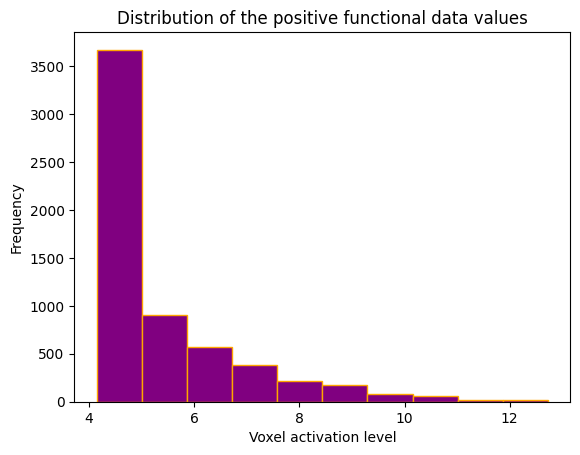

In [ ]:
image = nib.load(uniformity_test_file)
image_data = image.get_fdata()
array_image_data= np.array(image_data)

positive_only=array_image_data[array_image_data>0]
fig, ax=plt.subplots(1,1)
ax.axes.hist(positive_only,
             color="purple",
             edgecolor="orange")


ax.set_title("Distribution of the positive functional data values")
plt.ylabel("Frequency")
plt.xlabel("Voxel activation level")

plt.show()